# Bisección

Presentaremos una implementación del seudocodigo de bisección en el texto guia.  En particular resolvemos la ecuación $\exp(x)-\sin(x)=0$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mifun(x):
  y=np.exp(x)-np.sin(x)
  return y

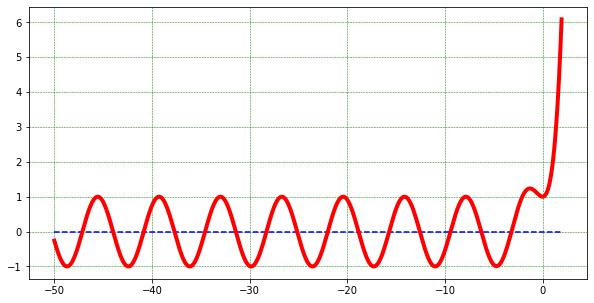

In [ ]:
a,b=-50,2
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

In [ ]:
a,b,M,delb,epsb=-4,-3,100,1E-8,1E-8
print(a,b,M,delb,epsb)
u=mifun(a)
v=mifun(b)
e=b-a
if np.sign(u)!=np.sign(v):
  for k in range(1,M):
    e=e/2
    c=a+e
    w=mifun(c)
    print('c={0:.15f}'.format(c))
    if np.abs(e)<delb or np.abs(w)<epsb :
      break
    else:
      if np.sign(w)!=np.sign(u):
        b=c
        v=w
      else:
        a=c
        u=w
print(k,w,e)

-4 -3 100 1e-08 1e-08
c=-3.500000000000000
c=-3.250000000000000
c=-3.125000000000000
c=-3.187500000000000
c=-3.156250000000000
c=-3.171875000000000
c=-3.179687500000000
c=-3.183593750000000
c=-3.181640625000000
c=-3.182617187500000
c=-3.183105468750000
c=-3.182861328125000
c=-3.182983398437500
c=-3.183044433593750
c=-3.183074951171875
c=-3.183059692382812
c=-3.183067321777344
c=-3.183063507080078
c=-3.183061599731445
c=-3.183062553405762
c=-3.183063030242920
c=-3.183062791824341
c=-3.183062911033630
c=-3.183062970638275
c=-3.183063000440598
c=-3.183063015341759
26 -3.546771550066996e-09 1.4901161193847656e-08


# Newton

En esta sección implementamos el método de newton. Esta vez crearemos una funcion con el método Newton


In [ ]:
def minewton(f,fp,x0,myeps,mydel,max_iter,verbose=True):
    '''f(x)=0 unando newton xn=xa-f(xa)/fp(xa)
    ----------
    f : funnción
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    M : Número maximo de iteraciones
    ----------
    '''
    x = x0
    for n in range(0,max_iter):
        fx = f(x)
        if abs(fx) < myeps:
            if verbose:
              print('residuo f(x(',n,'))=',fx)
            return x
        fpx = fp(x)
        if fpx == 0:
            if verbose:
              print('Derivada nula. Error!')
            return None
        x = x - fx/fpx
        if verbose:
          print( 'x(',n,')=',x)
        if abs(x-x0) < mydel:
            if verbose:
              print('incremento delta(',n,')=',fx)
            return x
        x0=x
    if verbose:
      print('Número maximo de iteraciones')
    return None


Usemos la función ateriore para resolver la ecuaciones $\exp(x)-\sin(x)$

In [ ]:
f = lambda x: np.exp(x)-np.sin(x)
fp = lambda x: np.exp(x)-np.cos(x)
approx = minewton(f,fp,1,1e-10,1e-10,10)

x( 0 )= 0.13827893045637507
x( 1 )= -6.263457215119403
x( 2 )= -6.281316869638125
x( 3 )= -6.2813143662108075
residuo f(x( 4 ))= 1.2010791666794418e-14


# Punto Fijo


In [ ]:
def miFpf(x):
  y=x+np.exp(x)-np.sin(x)
  return y

In [ ]:
x0=-4
for n in range(1,20):
  x1=miFpf(x0)
  x0=x1
  print('x={0:.15f} y={0:.15f}'.format(x1, miFpf(x1)))

x=-4.738486856419194 y=-4.738486856419194
x=-5.729394447160081 y=-5.729394447160081
x=-6.252060669705465 y=-6.252060669705465
x=-6.281253801923153 y=-6.281253801923153
x=-6.281314252785754 y=-6.281314252785754
x=-6.281314365998385 y=-6.281314365998385
x=-6.281314366210397 y=-6.281314366210397
x=-6.281314366210795 y=-6.281314366210795
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796
x=-6.281314366210796 y=-6.281314366210796


# Librerias

Usamos la librería scipy.optimize.fsolve para resolver una ecuacion. Para informacion adicional puede consultar https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve

In [ ]:
from scipy.optimize import fsolve

def myfun2(x):
   y = np.exp(x)-np.sin(x)
   print(x,'\t\t',y)
   return y

z = fsolve(myfun2,-3)
print(z)
print(myfun2(z))

[-3] 		 [0.19090708]
[-3.] 		 [0.19090708]
[-3.] 		 [0.19090708]
[-2.99999996] 		 [0.19090712]
[-3.18360341] 		 [-0.00056233]
[-3.18306419] 		 [-1.22193941e-06]
[-3.18306301] 		 [2.63640845e-11]
[-3.18306301] 		 [2.15105711e-16]
[-3.18306301]
[-3.18306301] 		 [2.15105711e-16]
[2.15105711e-16]


Obtenemos la raiz $r\approx-3.18306301$ con un residuo $\approx 2\times 10^{-16}$. Usemos ahora scipy para resolver un sistema de tres ecuaciones con tres incognitas. Agregamos print dentro de la función para imprimir los iterados. 

In [ ]:
def myFvec(x):
  y = np.empty((3))
  y[0]=x[0]*x[1]-x[2]**2
  y[1]=x[0]*x[1]*x[2]-x[0]**2+x[1]**2
  y[2]=np.exp(x[0])-np.exp(y[1])+x[2]-3
  print(x)
  return y

x0 = np.array([0,1,0])
r = fsolve(myFvec,x0)
print(r)

[0 1 0]
[0. 1. 0.]
[0. 1. 0.]
[1.49011612e-08 1.00000000e+00 0.00000000e+00]
[0.         1.00000001 0.        ]
[0.00000000e+00 1.00000000e+00 1.49011612e-08]
[2.98023206e-08 5.00000004e-01 1.99999989e+00]
[2.15224589 0.63095647 0.40336098]
[0.70471843 0.75002461 1.92043266]
[1.71223427 0.71676582 0.90555853]
[1.28040009 0.89465479 0.62982444]
[1.12818885 0.84469574 0.83379873]
[1.04078636 0.70022687 0.85312251]
[1.1672988  0.71334999 0.97766916]
[1.11339844 0.73465633 0.87826283]
[1.12912734 0.72850593 0.90563147]
[1.12929794 0.72788239 0.9068089 ]
[1.12925282 0.72794401 0.90666318]
[1.12925139 0.727945   0.90666039]
[1.12925132 0.72794503 0.9066603 ]
[1.12925132 0.72794503 0.90666029]
[1.12925132 0.72794503 0.90666029]


# Problemas


**Problema 1(Quarteroni, Saleri, Gervasio)** Considere un plano cuya pendiente varía con tasa constante $\omega$ y un punto de masa quieto en el tiempo $t=0$. En el tiempo $t>0$ su posición es dada por
$$s(t,\omega)= \frac{g}{2\omega^2}\Big[ \sinh(\omega t)-\sin(\omega t) \Big] $$
donde $g=9.8 \frac{m}{s^2}$. Suponga que el objeto se ha movido 1 metro en un segundo, calcule el valor correspondiente de $\omega$ con 12 decimales exactos. 

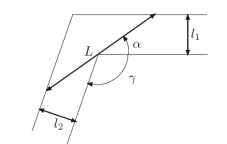

**Problema 2(Quarteroni, Saleri, Gervasio)** La longitud maxima de una varilla que se puede arrastrar de un extremo a otro deslizandola por un pasillo como el de la fiugra es 
$$L=\frac{l_2}{\sin(\pi-\gamma-\alpha)}+\frac{l_1}{\sin(\alpha)}$$
donde $\alpha$ es la solución de la ecuación
$$ l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0.$$
Calcule $\alpha$ cuando $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$. ¿Cuántos decimales puede garantizar para $\alpha$ y $L$?

**Problema 3** Adicionar criterios de parada de tolerancia al incremento y tolerancia al residuo para el caso del método de punto fijo implementado arriba. Use el código para calcular una raíz de $e^x-\sin(x)$.

**Problema 4 (Quarteroni, Saleri, Gervasio)** Note que $f(x)=e^x-2x^2$ tiene 3 raíces, $\alpha_1<0$, y $\alpha_2,\alpha_3>0$. ¿Para cuales valores de $x_0$ el método de Newton converge a $\alpha_1$?. 


**Problema 5** Selecciones dos de los métodos en https://docs.scipy.org/doc/scipy-0.13.0/reference/optimize.html en la sección Root finding, diga cual es el método numerico implementado (e.g, similar a newton, usa derivadas, no usa derivadas, combina varios métodos, llama alguna otra subrutina conocida encontrada en netlib(https://www.netlib.org/), cuales son las toleracias por defecto, etc)  y para cada uno de los métodos seleccionados implementar un ejemplo numérico con una ecuación escalar o una ecuación vectorial según sea el caso. Imprima la solución calculada asi como alguna informacion adicional (residuo, cantidad de iteraciones, etc). 

Si usa MatLab seleccione dos de entre los métodos como fsolve, froot, fzero, roots, o similares (https://la.mathworks.com/help/optim/systems-of-nonlinear-equations.html). Análogamente para octave (https://octave.org/doc/v4.2.0/Solvers.html), julia, etc.

# Solución problema 1

Para solucionar este caso, simplemente evaluamos la función en t=1, sabemos que s=1, entonces resolvemos el problema de raíces
$$
  0=\frac{g}{2\omega^2}[sinh(\omega)-sin(\omega)]-1
$$

In [ ]:
from scipy.optimize import fsolve
import numpy as np
g=9.8

def problem1(w):
   y = g*(np.sinh(w)-np.sin(w))/(2*w**2)-1
   print('w={:.17f}\t y={}'.format(w[0],y[0]))
   return y

format_string = "{:.12f}"
z = fsolve(problem1,0.8, xtol=1e-12)
print('12 decimal w=',format_string.format(z[0]))
print('y(w)=',problem1(z)[0])

w=0.80000000000000004	 y=0.3073038551745173
w=0.80000000000000004	 y=0.3073038551745173
w=0.80000000000000004	 y=0.3073038551745173
w=0.80000001192092896	 y=0.30730387469284404
w=0.61231242435144551	 y=0.00027765963506753977
w=0.61214268878972988	 y=1.930360478130666e-07
w=0.61214257070314892	 y=8.837375276016246e-14
w=0.61214257070309486	 y=6.661338147750939e-16
12 decimal w= 0.612142570703
w=0.61214257070309486	 y=6.661338147750939e-16
y(w)= 6.661338147750939e-16


Obtenemos  $\omega\approx 0.612142570703$ con un residuo $\approx 6.66\times 10^{-16}$.

# Solución problema 2

si $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$
$$ 
\frac{10\cos(\frac{2}{5}\pi-\alpha)}{\sin^2(\frac{2}{5}\pi-\alpha)}-\frac{8\cos(\alpha)}{\sin^2(\alpha)}=0.
$$
Y
$$
L=\frac{10}{\sin(\frac{2}{5}\pi-\alpha)}+\frac{8}{\sin(\alpha)}
$$

In [ ]:
from scipy.optimize import fsolve
import numpy as np

def L(a):
  y=10/np.sin(2*np.pi/5-a)+8/np.sin(a)
  return y

def problem2(a):
   y = 10*np.cos(2*np.pi/5-a)/np.sin(2*np.pi/5-a)**2-8*np.cos(a)/np.sin(a)**2
   print('a={:.17f}\t y={}'.format(a[0],y[0]))
   return y

z = fsolve(problem2,4)[0]
print('a=',z)
print('L=',L(a))

a=4.00000000000000000	 y=-52.1651971139244
a=4.00000000000000000	 y=-52.1651971139244
a=4.00000000000000000	 y=-52.1651971139244
a=4.00000005960464478	 y=-52.16521758926377
a=3.84814473706134086	 y=-16.757819944994623
a=3.77627374978417807	 y=-5.618100368691696
a=3.74002701867444642	 y=-0.31538501031633004
a=3.73787120323039845	 y=0.0002017890380940912
a=3.73787258167818415	 y=-9.122921440507525e-08
a=3.73787258105526687	 y=-1.7763568394002505e-14
a= 3.737872581055267
L= 182.58041588523918


garantizamos diez decimales para $\alpha\approx 3.7378725810$ y para $L\approx 182.58041588$, ocho decimales por cifras significativas.



# Solución problema 3

Añadimos criterio de parada para nmax (número máximo de iteraciones) y para rtol. Si $|f(x_{n})-f(x_{n-1})|<rtol$, entonces también parará.  

In [ ]:
def problem3(x,verbose=False):
  y=x+np.exp(x)-np.sin(x)
  if verbose:
    print('x={:.17f}\t y={}'.format(x,y))
  return y

def punto_fijo(f,x0,nmax,rtol=1e-12,verbose=False):
  r=0
  for i in range(-11,nmax+1):
    x1=f(x0,verbose)
    r=abs(x1-x0)
    if(r<rtol):
        if(verbose):
          print('iterations=',i)
          print('f(x)=',f(x1))
          print('x=',x1)
          print('r=',r)
        return x1
    x0=x1

  if(verbose):
    print('iterations=',i)
    print('f(x)=',f(x0))
    print('x=',x0)
    print('r=',r)

  return x0


punto_fijo(problem3,-4,100,1e-16,True)
pass

x=-4.00000000000000000	 y=-4.738486856419194
x=-4.73848685641919420	 y=-5.729394447160081
x=-5.72939444716008062	 y=-6.252060669705465
x=-6.25206066970546459	 y=-6.281253801923153
x=-6.28125380192315319	 y=-6.281314252785754
x=-6.28131425278575417	 y=-6.281314365998385
x=-6.28131436599838544	 y=-6.281314366210397
x=-6.28131436621039718	 y=-6.281314366210795
x=-6.28131436621079509	 y=-6.281314366210796
x=-6.28131436621079597	 y=-6.281314366210796
iterations= -2
f(x)= -6.281314366210796
x= -6.281314366210796
r= 0.0


una raíz es $\alpha\approx -6.2813143662107959$.

In [ ]:
a=-6.2813143662107959
print(np.exp(a)-np.sin(a))

4.861562541425002e-16


#Solucion problema 4

In [ ]:
p4  = lambda x: np.exp(x)-2*x**2
pp4 = lambda x: np.exp(x)-4*x
approx = minewton(p4,pp4,-2,1e-10,1e-10,100)

x( 0 )= -1.033270978644354
x( 1 )= -0.6368605427001038
x( 2 )= -0.5451192403755529
x( 3 )= -0.5398525697450826
x( 4 )= -0.5398352770891413
x( 5 )= -0.5398352769028201
residuo f(x( 6 ))= 0.0


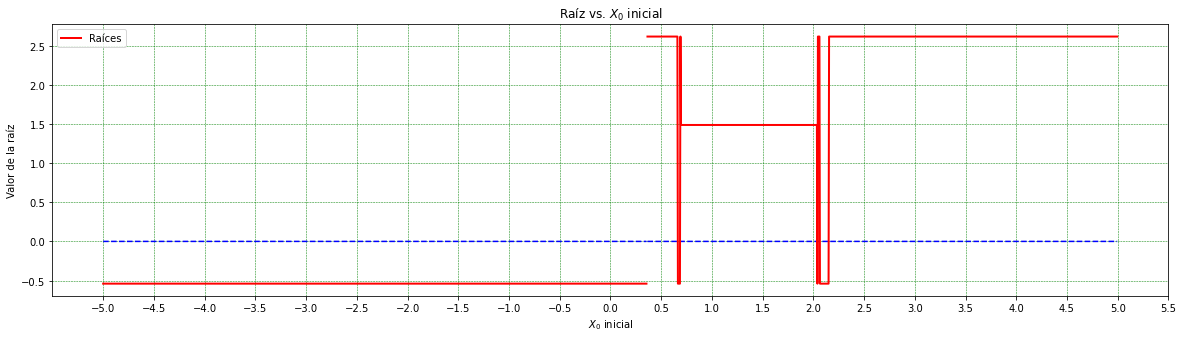

In [ ]:
a,b=-5,5
x = np.arange(a, b, (b-a)/2000)
y = np.arange(a, b, (b-a)/2000)
for i in range(len(x)):
  y[i]=minewton(p4,pp4,x[i],1e-10,1e-10,100,False)

plt.figure(figsize=(20, 5))
plt.plot(x, y*0, 'b--')
plt.plot(x, y, 'r-',linewidth=2, label='Raíces')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.ylabel('Valor de la raíz')
plt.xlabel('$X_0$ inicial')
plt.xticks(np.arange(min(x), max(x)+1, 0.5))
plt.title('Raíz vs. $X_0$ inicial')
plt.legend()
plt.show()

En la gráfica se puede ver que valores iniciales menores a $X_0\approx 0.4$, Newton converge a $ \alpha_1\approx-0.5398$. Tambien converge a esta raíz en algunos puntos cercanos a $X_0\approx 0.7$ y $X_0\approx 2.1$. Entre $(0.7, 2)$ converge a $ \alpha_2\approx1.48796$. Para valores mayores a $X_0\approx 2.2$ y algunos valores cercanos a $X_0\approx 0.7$ y $X_0\approx 2$ converge a $ \alpha_3\approx2.61786$.

# Solución problema 5

**scipy.optimize.broyden1**


*   Tipo: Multivariado
*   Método: Método de Newton inexacto. Primera aproximación del Jacobiano. 
*   Usa derivadas: Sí, el Jacobiano
*   Combina métodos: Sí
*   Sub rutina de netlib: No
*   Tolerancias por defecto: `tol=None`, `ftol=None`, `fatol=1e-6`, `xtol=None`, `xatol=None`, `tol_norm=Norma Máxima`
*   Fuente: https://docs.scipy.org/doc/scipy/reference/reference/optimize.root-broyden1.html#optimize-root-broyden1

*    Formalismo: Paso semi newtoniano del inverso del Jacobiano $H$. Primera aproximación del Jacobiano $J$
$$
J_+=J+(df-Jdx)dx^†/dx^†dx
$$




In [ ]:
from scipy import optimize

def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0, 0.5 * (x[1] - x[0])**3 + x[1]]

sol = optimize.broyden1(fun, [0, 0])
sol

array([0.84116396, 0.15883641])

**scipy.optimize.toms748**


*   Tipo: Escalar
*   Método: Utiliza una mezcla de interpolación cúbica y pasos quasi-Newtonianos. Encuentra la raíz de una función en un intervalo $[a,b]$ donde la función debe ser continua, deribable 4 veces y además de signos contrarios en los extremos.
*   Usa derivadas: Sí
*   Combina métodos: Sí
*   Sub rutina de netlib: No 
*   Tolerancias por defecto: `xtol=2e-12`, `rtol=8.881784197001252e-16`
*   Fuente: https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.optimize.toms748.html#scipy.optimize.toms748

In [ ]:
from scipy import optimize

def f(x):
    return (x**3 - 1)

root, results = optimize.toms748(f, 0, 2, full_output=True)
print(results)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 5
           root: 1.0
